In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Indicateurs


- ta: Temps d'adoption de la fake news
- tf: Taux de personnes qui croient à la fin
- gp: Indicateur sur p (la conviction)

## Représentation graphique de l'évolution de p en fonction du temps

### Pour plusieurs convictions p

In [21]:
def essai():
    L=[]
    L1= np.random.uniform(low=0.0, high=1.0, size=10)
    for k in range (5):
        for i in L1:
            L.append(i)
        return L

print(essai())

[0.6467133556635666, 0.22000382490181059, 0.25089593306567615, 0.04200180950872745, 0.1028462376934407, 0.04953759717990802, 0.4198437522722962, 0.042921804732214186, 0.29876765827076746, 0.5379973571283874]


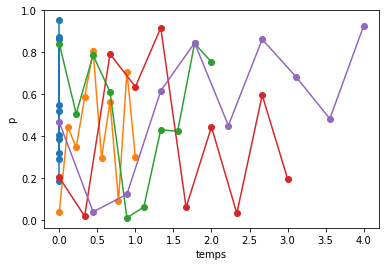

In [22]:
%matplotlib inline
N=5
t=0
for i in range (N):
    y=essai()
    x = np.linspace(0,t,10)
    plt.plot(x,y,marker='o')
    t=t+1
plt.ylabel('p')
plt.xlabel("temps")
plt.show()

### Pour une conviction p

In [31]:
import numpy as np
def ex():
    L=[0.5] #p est initialement égal à 0.5
    L1= np.random.uniform(low=0.0, high=1.0, size=4)
    while len(L)<5:
        for i in L1:
            L.append(i)
        return L
    
print(ex())

[0.5, 0.26065088568064687, 0.11351348123345784, 0.42644293492113783, 0.545714297148854]


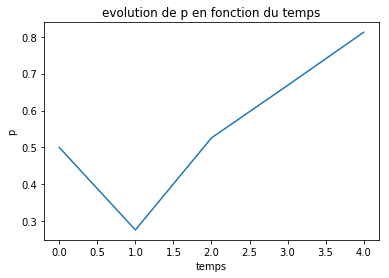

In [32]:
x=np.array([0,1,2,3,4])
y=ex()
plt.plot(x,y)
plt.xlabel('temps')
plt.ylabel('p')
plt.title('evolution de p en fonction du temps')
plt.show()

## Representation sous forme de liste du nombre de personnes convaincus à différents instants

In [33]:
import numpy as np

def init_systeme(N):
    """cet algorithme crée un groupe de population sous la forme d'une matrice de taille N, et un dictionnaire qui associe
    à chaque individu un tuple sous la forme dict{i:(op,dej_vu,fp,p)} où 
       op:opinion binaire de l'individu
       dej_vu: l'individu a déja vu ou pas le fake news
       fp: le pouvoir de persuasion de l'individu
       p:la conviction de l'individu """
    Population=np.arange(1,N*N+1).reshape(N,N)
    Dict_pop={str(i):(0,False,fp,0.5) for i in np.arange(1,N*N+1) 
        for fp in np.random.uniform(low=0.0, high=1.0, size=(N*N))}
        
    return Dict_pop

N_1dim=5
N=25
print("Nb_Pop=",N_1dim**2)
print("Dict_pop=",init_systeme(N_1dim))

Nb_Pop= 25
Dict_pop= {'1': (0, False, 0.24227343595558026, 0.5), '2': (0, False, 0.5690351206814516, 0.5), '3': (0, False, 0.35744920802054503, 0.5), '4': (0, False, 0.30689267390075525, 0.5), '5': (0, False, 0.08481447940268194, 0.5), '6': (0, False, 0.9529223713308774, 0.5), '7': (0, False, 0.9999496925921864, 0.5), '8': (0, False, 0.7142449332791246, 0.5), '9': (0, False, 0.7508720499662169, 0.5), '10': (0, False, 0.9069409660359544, 0.5), '11': (0, False, 0.7214334414986561, 0.5), '12': (0, False, 0.24990780169079663, 0.5), '13': (0, False, 0.8995825456278237, 0.5), '14': (0, False, 0.1888086144101111, 0.5), '15': (0, False, 0.4840391949212024, 0.5), '16': (0, False, 0.010241020825550784, 0.5), '17': (0, False, 0.017709569600747876, 0.5), '18': (0, False, 0.07315572411160376, 0.5), '19': (0, False, 0.7375190539437869, 0.5), '20': (0, False, 0.228996219434062, 0.5), '21': (0, False, 0.5837011911001747, 0.5), '22': (0, False, 0.6383012164389749, 0.5), '23': (0, False, 0.0232394235131

In [34]:
def selection_voisinage(Matrice,i):
    '''Sélection des voisinages d'un individu
    '''
    Ma=[]
    n=1  #numéro de la ligne

    if (i-1)//N_1dim==0:
        Ma.append([0,0,0])
        
    for l in Matrice:
        if (n==(i//N_1dim) or n==(i//N_1dim+1) or n==(i//N_1dim+2)) and (i%N_1dim!=0):
                if (i%N_1dim!=1) and (i%N_1dim!=0):
                    Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
                elif (i%N_1dim==1):
                    Ma.append([0,l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
        elif (n==(i//N_1dim-1) or n==(i//N_1dim) or n==(i//N_1dim+1)) and (i%N_1dim==0):
            Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],0])
            n=n+1
            
        else:
            n=n+1
            
    if (i-1)//N_1dim==(N_1dim-1):
        Ma.append([0,0,0])
    
    A=np.mat(Ma)
    return A

In [35]:
def influ_voisinage(mat_discu,reseau,seuil):
    
    P=[]   #liste des convictions des membres de la discussion
    F=[]   #liste des forces de persuasion des membres de la discussion
    N=[]   #liste des noms des membres de la discussion
    a_central=mat_discu[1,1] #agent central de la matrice discu
    i=0
    
    for k in np.nditer(mat_discu):
        if k!=0:
            op_k,deja_k,fp_k,p_k=reseau[str(k)]
            N.append(int(k))
            P.append(p_k)
            F.append(fp_k)
            
    if len(N)==2:
        reseau=force_persu(N[0],N[1],reseau)
    else:
        for a in N:
            op_a,deja_a,fp_a,p_a=reseau[str(a)]
            other_p=P[0:a]+P[a+1:len(P)]
            other_fp=F[0:a]+F[a+1:len(F)]            
            moy=np.average(other_p,weights=other_fp)
            if abs(p_a-moy)<seuil:
                p_a=moy
            reseau[str(a)]=(op_a,deja_a,fp_a,p_a)
    
            
    return reseau

Population=np.arange(1,(N+1)).reshape(N_1dim,N_1dim)

#Réseau à valeurs quelconques (au milieu de la simulation par exemple)
Test_reseau={str(k):(np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(1,N+1)}

Mat_discu=selection_voisinage(Population,1)
print(influ_voisinage(Mat_discu,Test_reseau,0.2))

{'1': (1, False, 0.8681926695522796, 0.5515537583548432), '2': (0, False, 0.3985147814827009, 0.7514357309429327), '3': (0, True, 0.6164164138969911, 0.8750419875724219), '4': (0, False, 0.2076442296827954, 0.3946324931374372), '5': (0, False, 0.7241718516777728, 0.1717465869245831), '6': (0, True, 0.8646504970540252, 0.5799984733455249), '7': (0, True, 0.6690188760193851, 0.18012820848455435), '8': (0, False, 0.1685411838017571, 0.2364199173162571), '9': (0, False, 0.548723000671373, 0.27956452185061065), '10': (1, True, 0.4308781462280933, 0.2976140882347408), '11': (0, True, 0.9082167365195155, 0.8194252381255933), '12': (0, False, 0.37347065982907135, 0.22848863176779477), '13': (0, False, 0.9693101557513057, 0.4122531695048922), '14': (0, True, 0.7923996477211818, 0.19373194232187374), '15': (0, True, 0.43576113313204146, 0.11348572611767616), '16': (1, False, 0.22867115857062525, 0.27615814031487507), '17': (1, False, 0.2339434747830733, 0.9230742583510303), '18': (0, True, 0.165

### Au temps initial (t=0):

In [36]:
def ex2():
    #renvoi la liste des convictions supérieures ou égales à t=0
    Dict_pop={str(i):(0,False,fp,0.5) for i in np.arange(1,N*N+1) 
        for fp in np.random.uniform(low=0.0, high=1.0, size=(N*N))}
    L=[]
    
    for (x,(q,w,s,z)) in Dict_pop.items():
            if z>= 0.5:
                L.append(z)
    return L


In [37]:
N=5
print(ex2())

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


### Au temps t>0:

In [38]:
def ex3():
    #renvoi la liste des convictions supérieures ou égales à 0.5 à t>0 (c'est-à-dire des personnes convaincus après l'influence du voisinage)
    Test_reseau={str(k):(np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(1,N+1)}
    M=[]
    
    for (y,(a,b,x,c)) in Test_reseau.items():
            if c>=0.5:
                M.append(c)
    return M

In [39]:
print(ex3())

[0.7951185617073676, 0.8047804725150639, 0.651526923870355]
